### 50 Day Moving Average for Google and Apple

Here we will showcase our calculated 50-day Moving Average with the 50-day closing. 

>Note: See Stock Price Analysis file for a better explanation of code structure

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [82]:
# Import CSV files
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')

['G:\\Dev Portfolio\\Data Analysis\\Time Series Analysis on S&P 500 Stock Market Data\\individual_stocks_5yr']

In [83]:
company_list = [    
    r'individual_stocks_5yr\\AAPL_data.csv' , 
    r'individual_stocks_5yr\\AMZN_data.csv' , 
    r'individual_stocks_5yr\\GOOGL_data.csv' , 
    r'individual_stocks_5yr\\MSFT_data.csv']
all_data = pd.DataFrame()

for company in company_list:
    current_df = pd.read_csv(company)
    all_data = pd.concat([all_data, current_df])

all_data.shape


(5036, 7)

In [84]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [85]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [86]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

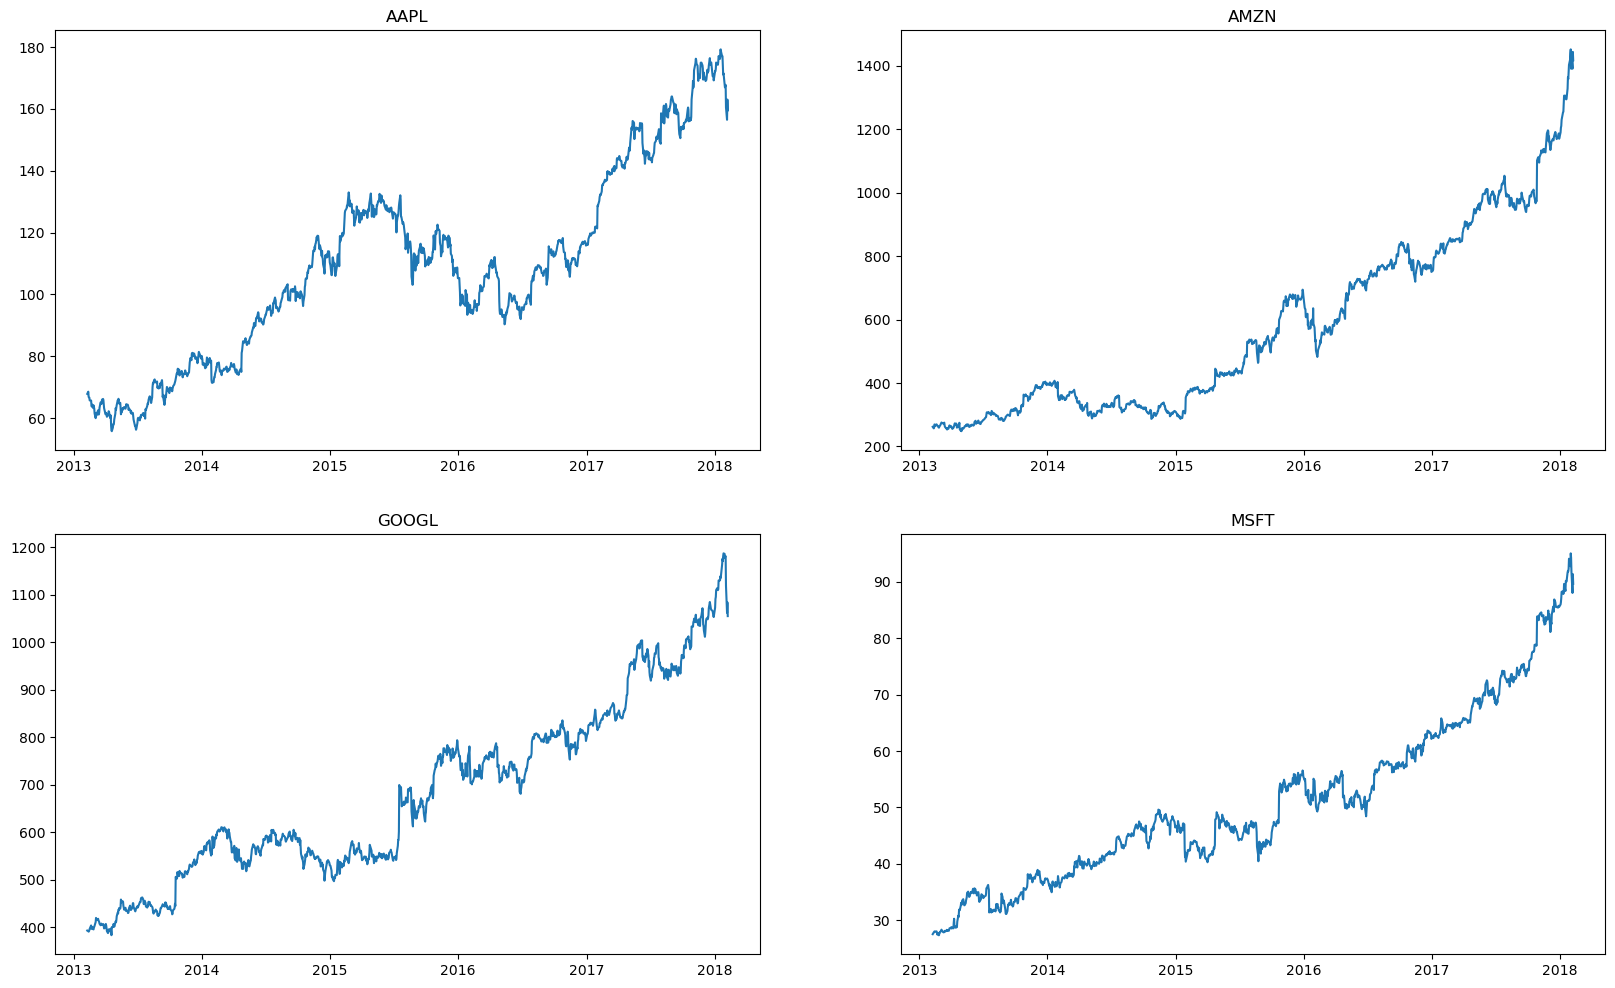

In [87]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    # creating subplot for each stock
    plt.subplot(2 , 2 , index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
     # plotting "date" vs "close"
    plt.plot(df['date'] , df['close'])
    plt.title(company)

<Figure size 640x480 with 0 Axes>

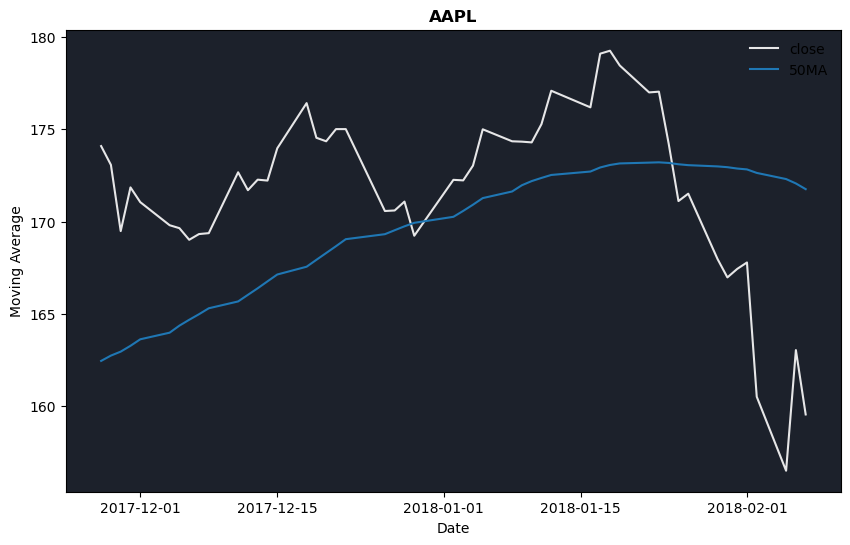

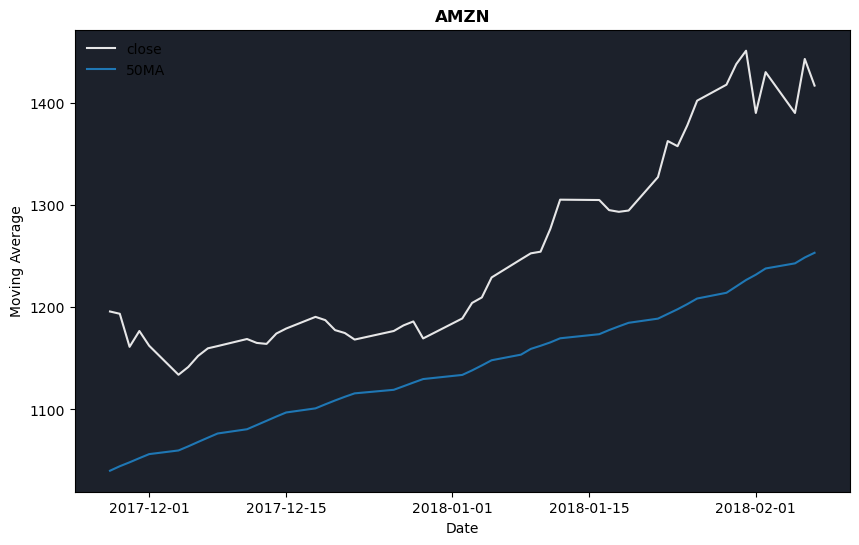

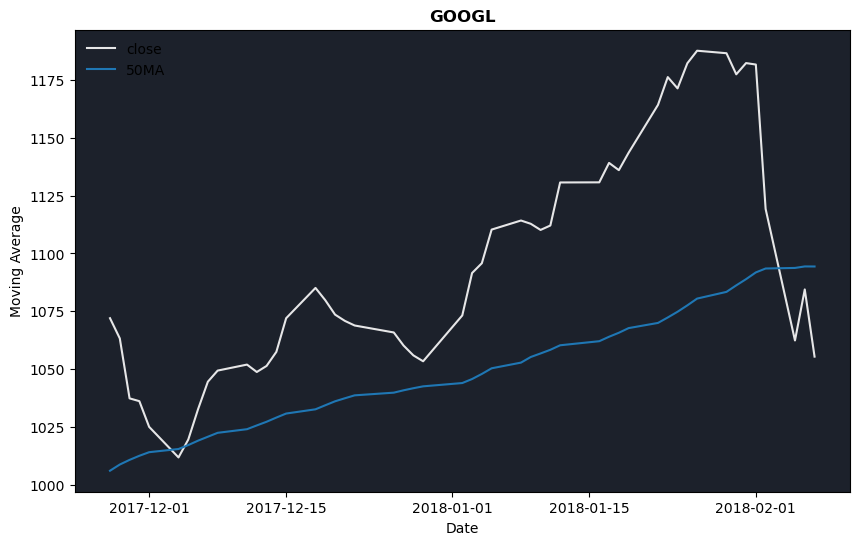

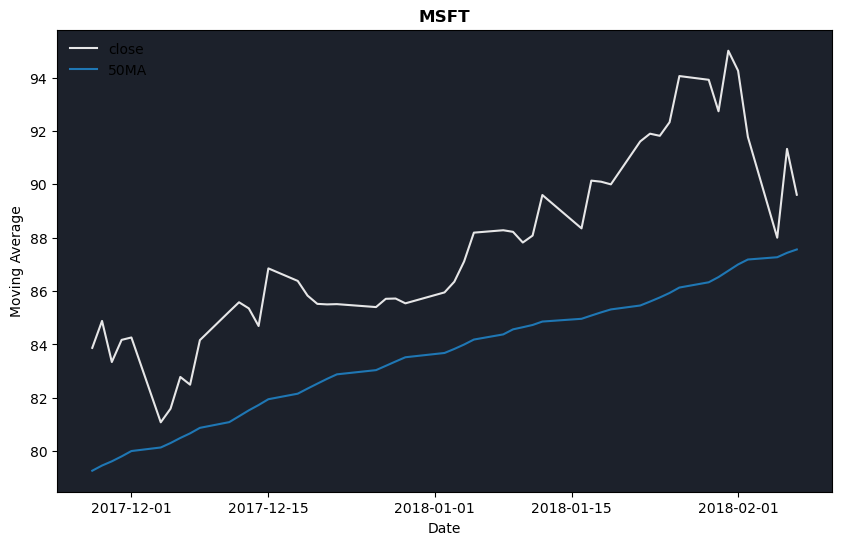

In [88]:
fig = plt.gcf()
fig.set_facecolor('#1C212B')

for company in tech_list:
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['date'].tail(50), df['close'].tail(50), color='#E6E6E7')
    ax.plot(df['date'].tail(50), df['close'].rolling(window=50).mean().tail(50))
    ax.set_facecolor('#1C212B')
    ax.legend(['close', '50MA'], frameon=False)
    ax.set_title(company, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moving Average')
    plt.show()



In [89]:
# get the list of all csv files
csv_files = glob.glob('individual_stocks_5yr/*.csv')

# read all csv files and concatenate them into a single dataframe
sp_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)


In [91]:
all_data['date'] =pd.to_datetime(all_data['date'])
all_data.set_index('date', inplace=True)


In [92]:
# Step 1: Load CSV files into a single DataFrame
folder_path = 'individual_stocks_5yr/'
all_files = os.listdir(folder_path)
df_list = []

for file in all_files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        # Assuming your CSV files have a 'Date' and 'Close' column
        df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
full_df = pd.concat(df_list, ignore_index=True)

# Step 2: Remove the 'Name' column
full_df.drop('Name', axis=1, inplace=True)

# Step 3: Set 'Date' as the index
full_df['Date'] = pd.to_datetime(full_df['date'])
full_df.set_index('date', inplace=True)

# Step 4: Resample the entire dataset per month
full_df_resampled = full_df.resample('M').mean()

# Step 5: Compute the overall 50-day moving average for the entire resampled dataset
# Assuming your DataFrame has a 'Close' column for stock prices
full_df_resampled['50_MA'] = full_df_resampled['close'].rolling(window=50).mean()

# Print the resulting DataFrame with the 50-day moving average
print(full_df_resampled)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'